In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


KNN

1.Data-Preprocessing

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-16/KNN/Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
data.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [8]:
data[data.duplicated()].count()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [11]:
data.dropna()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


2.Data Visuallizations

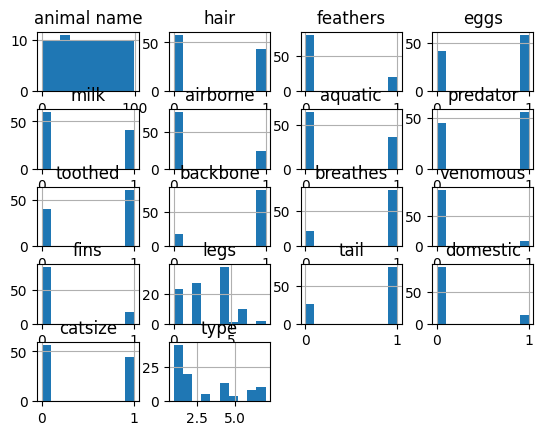

In [15]:
data.hist()
plt.show()

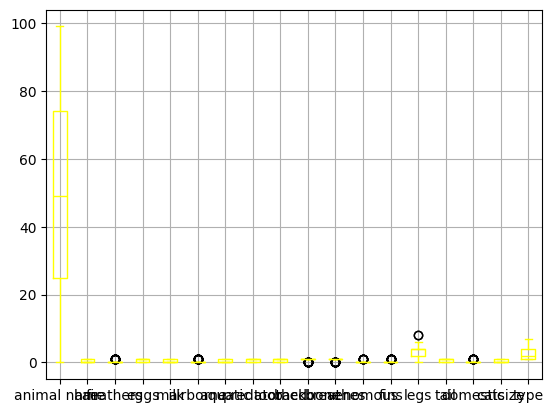

In [16]:
data.boxplot(color="yellow")
plt.show()

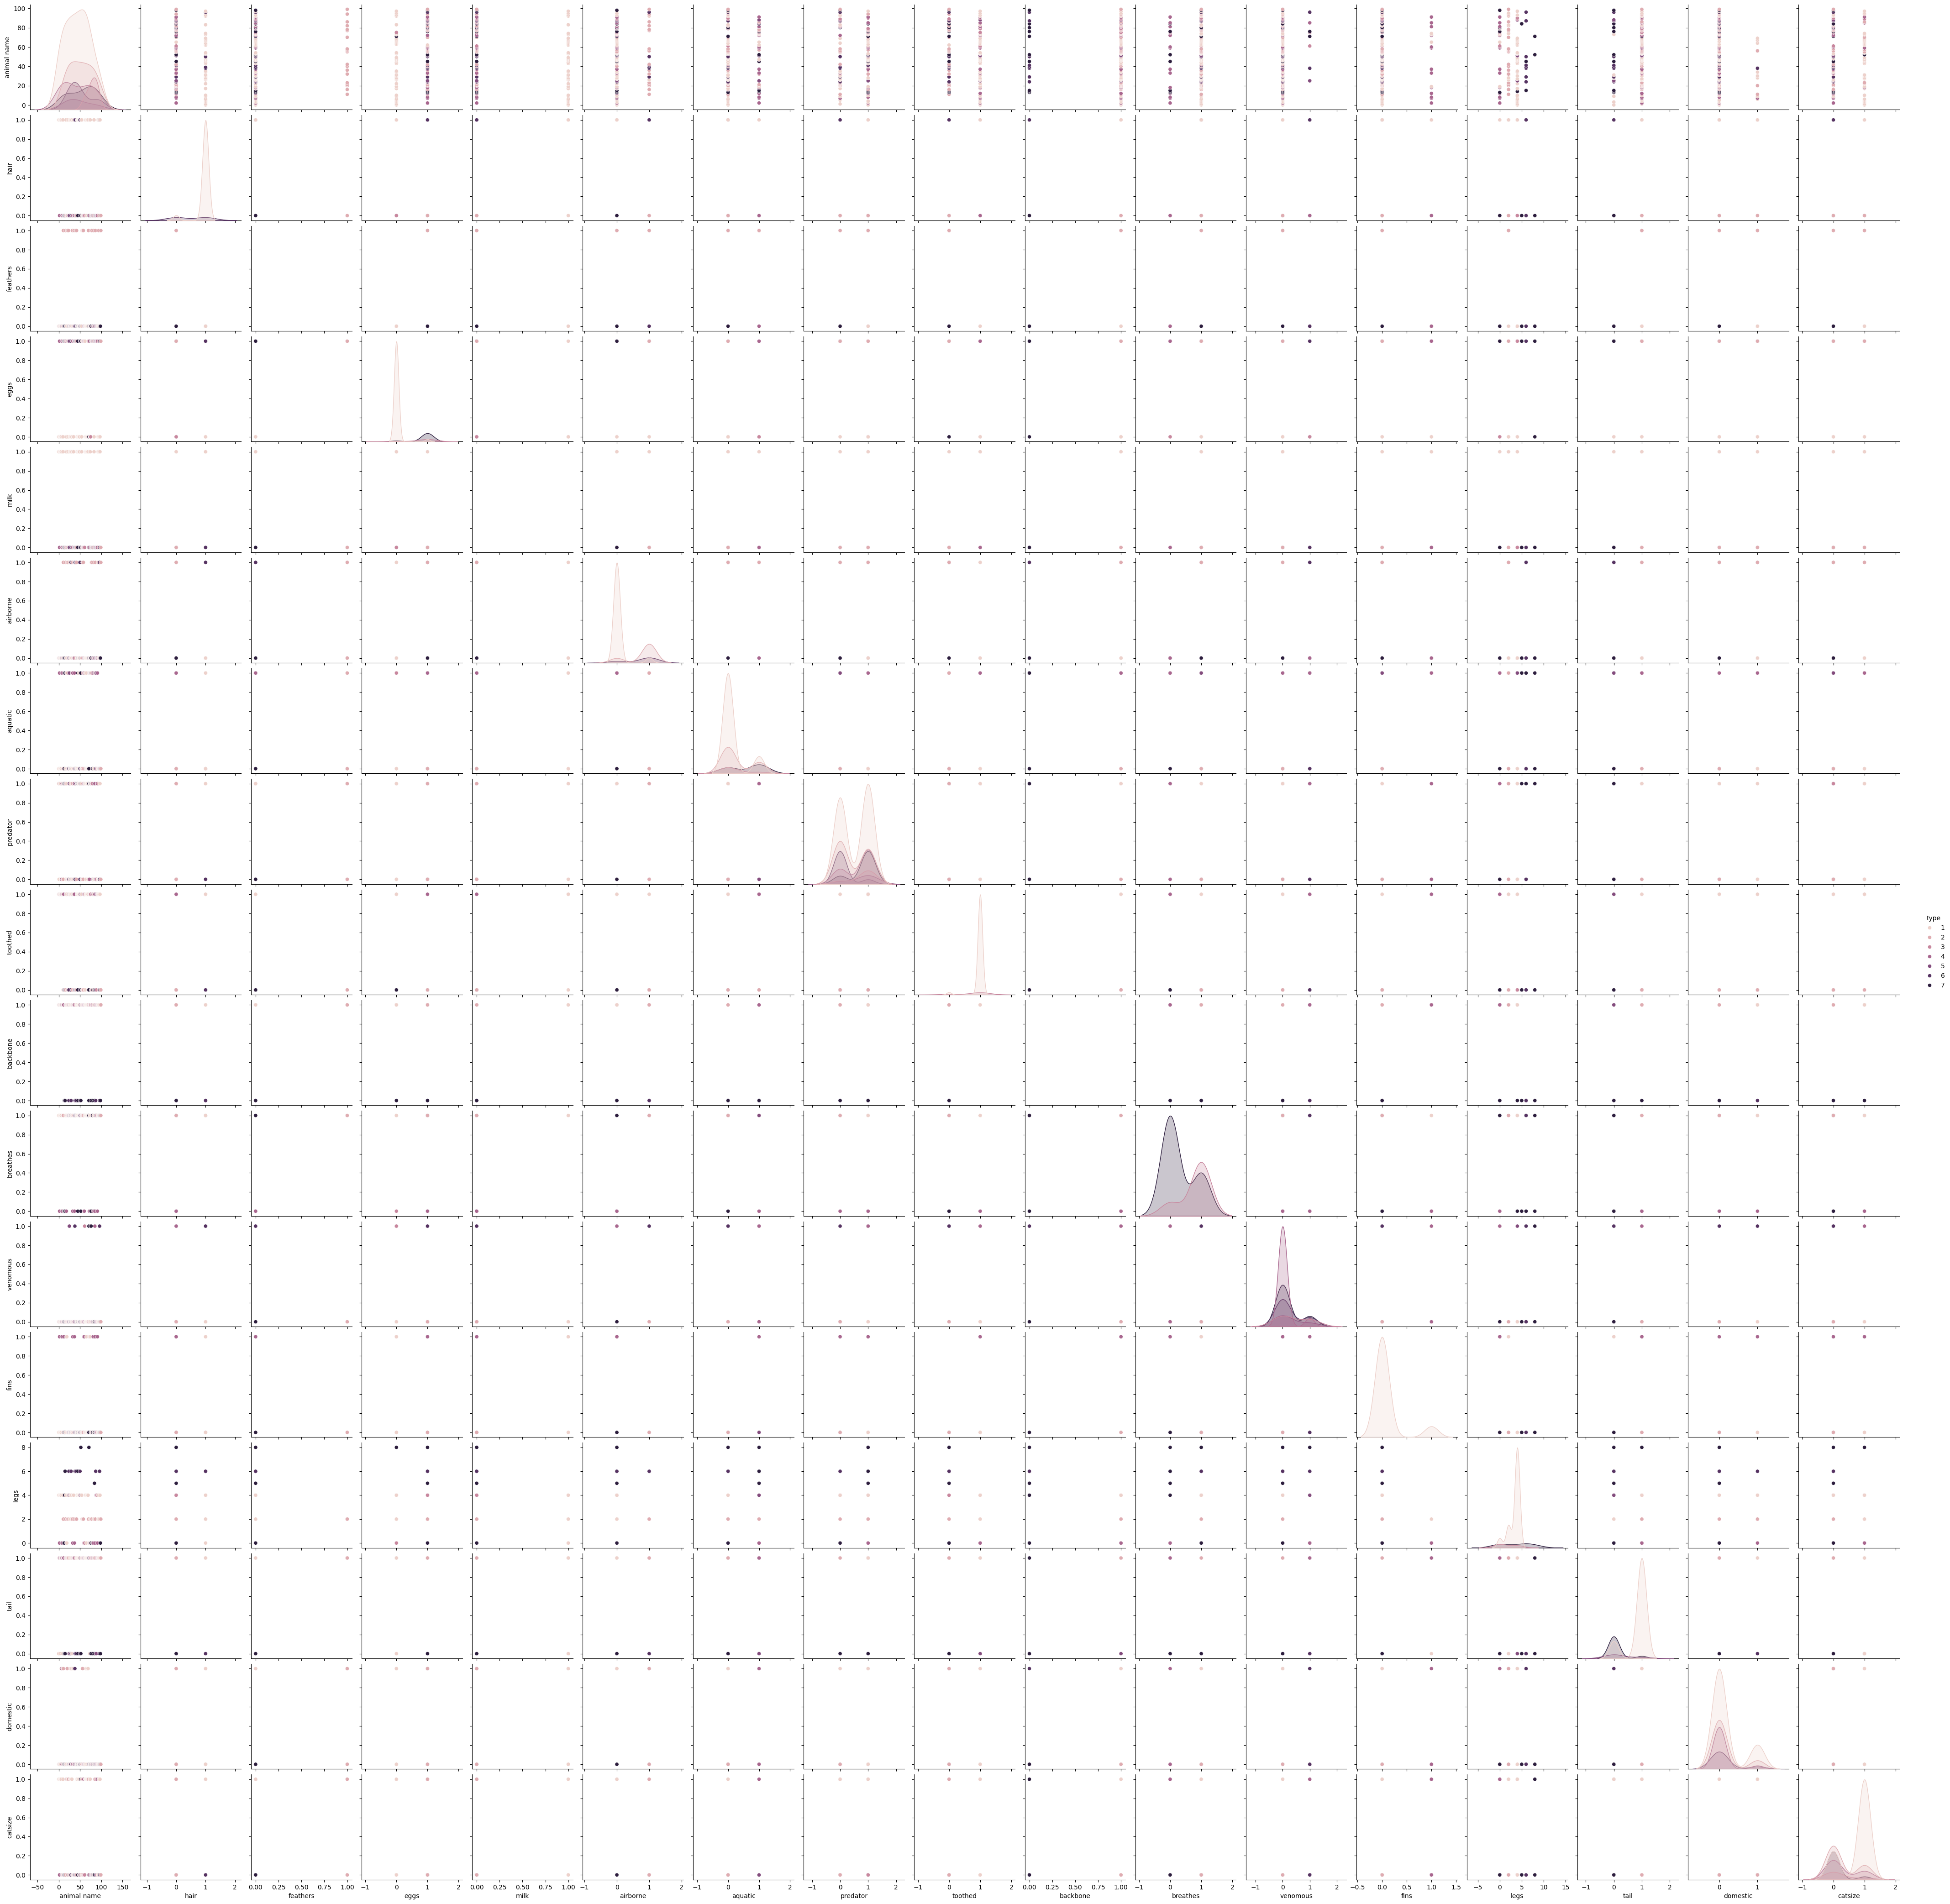

In [17]:
sns.pairplot(data,hue="type")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

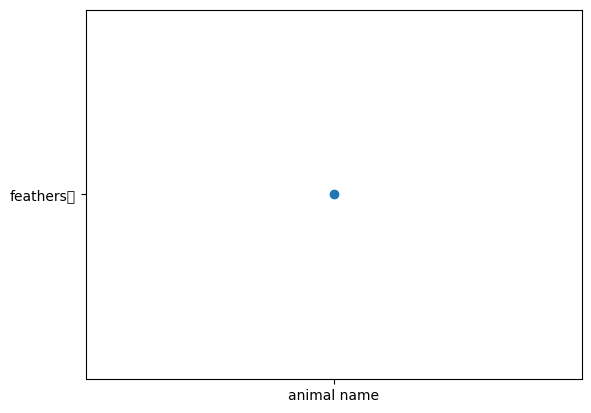

In [18]:
plt.scatter('animal name','feathers	')
plt.show

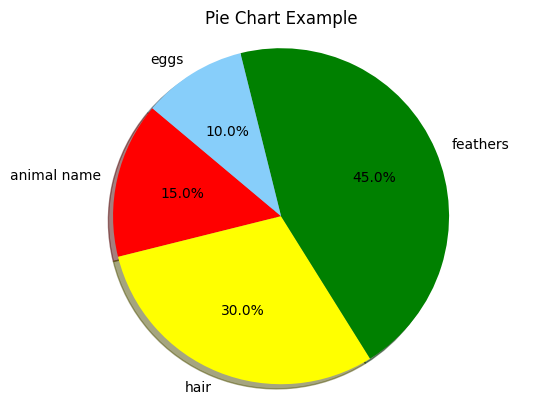

In [22]:
labels = ['animal name','hair','feathers','eggs']
sizes = [15, 30, 45, 10]
colors = ['red', 'yellow', 'green', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart Example')
plt.show()


3.Spliting the data

In [24]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x,y

(     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
 0              0     1         0     0     1         0        0         1   
 1              1     1         0     0     1         0        0         0   
 2              2     0         0     1     0         0        1         1   
 3              3     1         0     0     1         0        0         1   
 4              4     1         0     0     1         0        0         1   
 ..           ...   ...       ...   ...   ...       ...      ...       ...   
 96            95     1         0     0     1         0        0         0   
 97            96     1         0     1     0         1        0         0   
 98            97     1         0     0     1         0        0         1   
 99            98     0         0     1     0         0        0         0   
 100           99     0         1     1     0         1        0         0   
 
      toothed  backbone  breathes  venomous  fins  legs  tail 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=60)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 4

In [29]:
knn= KNeighborsClassifier(n_neighbors=k)

In [30]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [31]:
y_pred=knn.predict(x_train)
y_pred

array([1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2])

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [32]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_train))


              precision    recall  f1-score   support

           1       1.00      0.60      0.75        58
           2       0.81      0.57      0.67        23
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.12      1.00      0.22         1
           7       0.00      0.00      0.00         0

    accuracy                           0.58        85
   macro avg       0.28      0.31      0.23        85
weighted avg       0.90      0.58      0.70        85



In [33]:
print(accuracy_score(y_pred,y_train))

0.5764705882352941


7. Visualize the decision boundaries of the classifier.

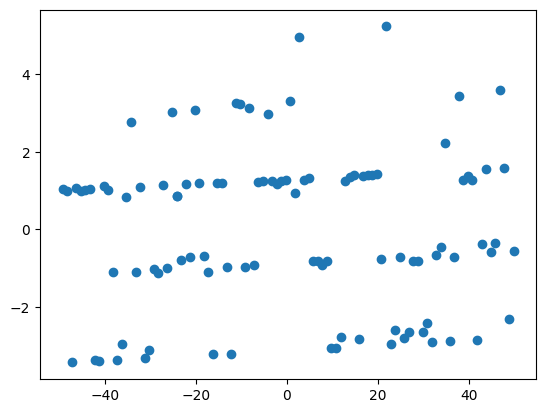

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(x,y)
plt.scatter(X_reduced[:,0], X_reduced[:, 1],)
plt.show()


1. What are the key hyperparameters in KNN?
In the K-Nearest Neighbors (KNN) algorithm, hyperparameters are parameters that are set prior to the training process and are not learned from the data. The key hyperparameters in KNN are;Number of neighbors (k),Distance metric,Weights,Algorithm,Leaf size

2. What distance metrics can be used in KNN?
In K-Nearest Neighbors (KNN), distance metrics are used to measure the similarity or dissimilarity between data points. Several distance metrics can be employed in KNN, depending on the nature of the data and the problem domain. Some common distance metrics used in KNN include:
Euclidean distance,Manhattan distance (City block distance or L1 distance),Minkowski distance,Chebyshev distance,Cosine similarity